In [1]:
# import libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset
df = pd.read_csv('data/titanic_temp.csv',usecols=['Age','Fare','Survived'])

df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [29]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Survived     0.000000
dtype: float64

In [28]:
df["Fare"].dropna(inplace=True)

In [4]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [6]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [7]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [8]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([65.  , 41.  , 21.  , 27.  , 23.  , 29.  , 25.  ,  6.  , 34.  ,
       19.  , 29.  ,  5.  , 29.  , 54.  , 26.  , 32.  , 30.  , 32.  ,
       58.  , 34.  , 41.  , 62.  , 20.  , 62.  , 18.  , 31.  , 23.  ,
       39.  , 31.  , 49.  , 27.  , 71.  , 24.  ,  9.  ,  0.83, 16.  ,
       32.  , 42.  ,  4.  , 44.  , 35.  , 32.  , 31.  , 28.  , 13.  ,
       25.  , 17.  , 21.  , 27.  , 39.  , 17.  , 36.  , 16.  , 16.  ,
       18.  , 34.  , 22.  ,  2.  , 21.  , 26.  , 36.  , 23.  , 17.  ,
       16.  , 32.  , 45.5 , 30.  , 22.  , 25.  , 20.  , 20.  , 51.  ,
       25.  ,  3.  , 30.  , 29.  , 32.  , 40.  ,  4.  , 42.  , 24.  ,
       39.  , 50.  ,  2.  , 24.  , 30.  , 22.  , 43.  , 47.  , 43.  ,
       20.  , 47.  , 27.  , 26.  ,  7.  , 18.  , 17.  , 35.  , 35.  ,
       28.  , 19.  , 24.  , 26.  , 32.5 , 45.  , 52.  , 22.  , 25.  ,
        1.  , 27.  , 50.  , 14.  , 31.  , 25.  , 36.  , 46.  , 48.  ,
       38.  , 18.  , 27.  , 31.  , 24.  , 21.  , 24.  , 35.  , 19.  ,
       32.  , 35.  ,

In [9]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,58.0
493,71.0,49.5042,71.0
527,NaN,221.7792,40.0


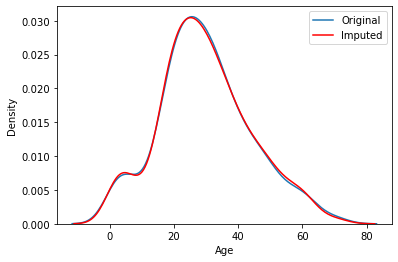

In [10]:
sns.kdeplot(X_train['Age'], label='Original')
sns.kdeplot(X_train['Age_imputed'], label = 'Imputed', color='red')

plt.legend()
plt.show()

In [11]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  203.81463468271494


In [12]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2448.197914,70.719262,55.292120
Age,70.719262,204.349513,204.349513
Age_imputed,55.292120,204.349513,203.814635


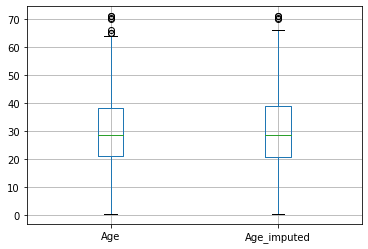

In [13]:
X_train[['Age', 'Age_imputed']].boxplot()
plt.show()

### for categorical data

In [14]:
data = pd.read_csv('data/train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [15]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [16]:
#split data into train test
X = data
y = data["SalePrice"]

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [18]:
X_train.head()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,TA,NaN
504,Fa,TA,147000,TA,Fa
1413,Gd,TA,257000,TA,Gd
1389,Gd,TA,131000,TA,Gd


In [19]:
X_test.head()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
503,TA,TA,289000,TA,TA
101,TA,TA,178000,TA,TA
608,Gd,TA,359100,TA,Gd
1089,Gd,TA,197000,TA,Gd
819,Gd,TA,224000,TA,Gd


In [20]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\keskh\AppData\Local\Temp\ipykernel_5736\856878696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\keskh\AppData\Local\Temp\ipykernel_5736\856878696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\keskh\AppData\Local\Temp\ipykernel_5736\856878696.py:4: SettingWithCopyWarning: 
A value

In [21]:
X_train.head()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,TA,Gd
504,Fa,TA,147000,TA,Fa
1413,Gd,TA,257000,TA,Gd
1389,Gd,TA,131000,TA,Gd


In [22]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [23]:
temp

,original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.036815
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.001712


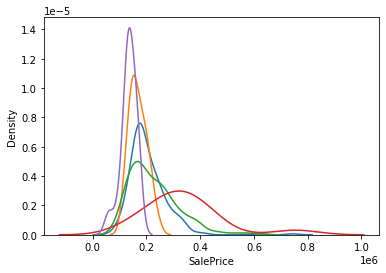

In [24]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],label=category)
plt.show()

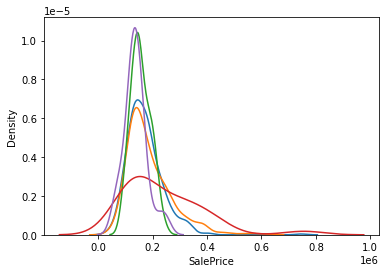

In [25]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],label=category)
plt.show()